[2.84, 0.05, 0.425, 0.7, 0.7, 0.0019, 0.0022, 0.01, 0.01, 1.45]
Mad= 0.0035
nodaysLake=1
nodaysRiver=3
M= 38.02 37.18
k_P= 0.0022 0.000912 0.000372 0.000149 2.9e-5
k_IP= 0.01 0.000647 0.000264 0.000105 2.0e-5
Mean(Qsim)= 0.004445050163698296
56.1
KGE=0.93
NSE=0.898
bias=0.952
Pkorr=0.7
Time elapsed[s]= 176.0243401


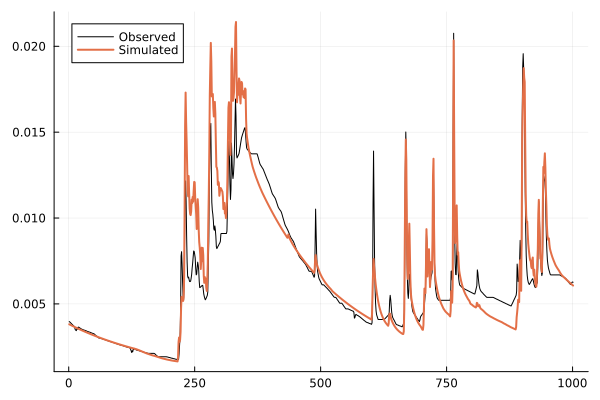

In [5]:
"""
Runs DDD model either in single run model or for calibration
The model itself is called as a function which calls on several functions
"""
#using CSV
using Distributions
using LsqFit
using Statistics
using Dates
using DataFrames
using Plots
using CSV
using BlackBoxOptim
using JLD2

##Preprocessing routines
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\Big2SmallLambda.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\CeleritySubSurface.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SingleUH.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SingleNormalUH.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\LayerEstimation.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\PyrAreas.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\GrWPoint.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\RiverPoint.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\TemperatureVector.jl")

##EB and Snow Routines
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\NedbEBGlac_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SnowpackTemp.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\TempstartUpdate.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SmeltEBGlac_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\CloudCoverGlac_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\TssDewpoint.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SolradTransAlbedoper_hrs_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\LongWaveRad_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SensibleLatHeat_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\AlbedoUEB_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\GroundPrecCC.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SnowGamma.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\Varc.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\NewSnowDensityEB.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\NewSnowSDEB.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\DensityAge.jl")

#Subsurface and Evaporation routines
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\LayerCapacityUpdate.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\PotentialEvapPT.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\UnsaturatedEvapEB.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\LayerEvap.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\UnsaturatedExEvap.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\WetlandsEB.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\GrvInputDistributionICap2022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\OFICap.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\LayerUpdate.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\BogLayerUpdate.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\RiverUpdate.jl")
## Overland Flow routine
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\OverlandFlowDynamicDD.jl")
## Efficiency criteria
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\NSEJM.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\KGEJM.jl")
# Model Module
#include("F:\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\DDDUrbanFunc.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\DDDAllTerrain22012024.jl")
########################################################################################

catchment = "56.1"  # stationnumber

TR = "5min"         # this is just a marker for naming files, does NOT set the temporal resolution

ptqfile = string("\\\\nve.no\\fil\\h\\HM\\Interne Prosjekter\\UrbanDesignFlom\\inndata\\Sandsli\\S1_",
    catchment,"_",TR,"_ptq_kal.csv") 

r2fil = string("\\\\nve.no\\fil\\h\\HM\\Interne Prosjekter\\UrbanDesignFlom\\utdata\\Sandsli\\r2_",
    catchment,"_",TR,"_kal.csv")

utfile  = string("\\\\nve.no\\fil\\h\\HM\\Interne Prosjekter\\UrbanDesignFlom\\utdata\\Sandsli\\simres_",
    catchment,"_",TR,"_kal_DDDv2.csv")  

paramfile = string("\\\\nve.no\\fil\\h\\HM\\Interne Prosjekter\\UrbanDesignFlom\\DDDurbanParameters\\",
    catchment,"\\ParDDDv2_",catchment,"_",TR,".csv")

spinup = (31*4) #days used to spin up the model. 

prm = CSV.read(paramfile,DataFrame,header=["Name", "val"], delim=';')
#prm = CSV.read(paramfile,header=["Name", "val"], delim=';')

#            u,          pro           TX,         Pkorr        skorr,     GscInt      OVP          
#         OVIP       Lv            rv        
tprm = [prm.val[20], prm.val[21], prm.val[22], prm.val[18], prm.val[19],prm.val[33], prm.val[34], 
    prm.val[35],prm.val[36],prm.val[37]]
println(tprm)


Gshape, Gscale = Big2SmallLambda(prm.val[32], prm.val[33]) # Coverting integrated celerity to layers takes too long in calibration: preprocessing
Gpar = [Gshape, Gscale]


startsim = 1 
kal = 0
modstate = 0
savestate = 0

t1= time_ns()

function calib_wrapper_model(Gpar,startsim, tprm, prm, ptqfile, utfile, r2fil, modstate, savestate, kal, spinup)
 qobs, qberegn, KGE, NSE, bias = DDDAllTerrain(Gpar,startsim, tprm, prm, ptqfile, utfile, r2fil, modstate, savestate,
        kal, spinup)  
 return qobs,qberegn, KGE,NSE,bias 
end

function calib_single_wsh(Gpar,startsim, tprm, prm, ptqfile, utfile, r2fil, modstate, savestate, kal, spinup)
 qobs, qberegn, KGE, NSE, bias = DDDAllTerrain(Gpar,startsim, tprm, prm, ptqfile, utfile, r2fil, modstate, savestate,
        kal, spinup)    
 return (1.0 - KGE)
end

if(kal == 0)
    qobs,qberegn,KGE,NSE, bias = calib_wrapper_model(Gpar,startsim, tprm, prm, ptqfile, utfile, r2fil,
        modstate, savestate,kal, spinup) # a single run 
    
    println(catchment)
    println("KGE=",round(KGE,digits=3))
    println("NSE=",round(NSE,digits=3))
    println("bias=",round(bias,digits=3))
end

if(kal == 1) # calibrate
    #                   u,        pro,         TX,        Pkorr,    skorr,          GscInt,         OVP     OVIP 
    param_range = [(1.0,3.0), (0.05,0.05), (-0.5, 0.5), (0.5, 2.0), (0.5,2.0), (0.065,0.075), (tprm[7],tprm[7]),
        (tprm[8],tprm[8]), (tprm[9],tprm[9]),(tprm[10],tprm[10])] # 
    
    println(param_range)
    calib_single_wsh_tmp(param) = calib_single_wsh(Gpar,startsim, param, prm, ptqfile, utfile, r2fil,
                                           modstate, savestate, kal, spinup)
    res = bboptimize(calib_single_wsh_tmp; SearchRange = param_range, MaxSteps = 1000, TraceMode = :verbose)
    param_hydro = best_candidate(res)
    println(param_hydro)
end

t2 = time_ns()
println("Pkorr=", round(tprm[4],digits=3))
println("Time elapsed[s]= ",(t2-t1)/1.0e9)

if(kal==0)
 plot(qobs[15240:16240], color="black",label = "Observed",lw =1)
 plot!(qberegn[15240:16240],label = "Simulated", lw = 2)
end 
 